In [1]:
# Carga de librerias
import pandas as pd   ## principal módulo para la manipulación y análisis de datos (DataFrames)
import numpy as np   ## módulo de manipulación de matrices y vectores, cálculos numericos
import matplotlib.pyplot as plt ## principal módulo para gráficas
import seaborn as sns   ## otro módulo de gráficas

import plotly.express as px
import plotly.graph_objects as go


In [4]:
# Carga de Datos de Medidor de calidad de Energia ION8650 en CT FRJ1N

frj1n = pd.read_excel(r"/content/sample_data/ION_FRJ_.xlsx")

# Nueva sección

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
frj1n.columns = ['date','vll_ab','vll_bc', 'vll_ca', 'vll_avg', 'v_unbal', 'i_a', 'i_b', 'i_c', 'i_avg','kw_tot', 'kvar_tot', 'kva_tot', 'freq','SWITCH']

In [7]:
# Dimensiones del set de datos FRJ
filycol2 = frj1n.shape
filycol2

(36558, 15)

In [8]:
frj1n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36558 entries, 0 to 36557
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      36558 non-null  datetime64[ns]
 1   vll_ab    36558 non-null  float64       
 2   vll_bc    36558 non-null  float64       
 3   vll_ca    36558 non-null  float64       
 4   vll_avg   36558 non-null  float64       
 5   v_unbal   36558 non-null  float64       
 6   i_a       36558 non-null  float64       
 7   i_b       36558 non-null  float64       
 8   i_c       36558 non-null  float64       
 9   i_avg     36558 non-null  float64       
 10  kw_tot    36558 non-null  float64       
 11  kvar_tot  36558 non-null  float64       
 12  kva_tot   36558 non-null  float64       
 13  freq      36558 non-null  object        
 14  SWITCH    36558 non-null  int64         
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 4.2+ MB


In [9]:
# Visualizacion de la informacion FRJ
frj1n.head(5)

,date,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,SWITCH
0,2023-05-02 20:45:00,13564.601,13676.08800,13625.21582,13621.96800,0.681128,28.492443,25.620981,25.445852,26.460642,615.075439,57.009579,617.649658,60.066013,0
1,2023-05-02 20:30:00,13503.564,13602.38000,13570.26700,13555.15625,0.626721,29.036205,25.575148,25.502625,26.653734,618.490417,59.718563,620.937866,60.043034,0
2,2023-05-02 20:15:00,13567.913,13658.65332,13634.95500,13620.50800,0.607101,28.467047,25.240606,25.277708,26.248981,610.750916,54.337734,612.865906,60.032059,0
3,2023-05-02 20:00:00,13533.777,13599.11600,13590.74600,13571.46100,0.536207,28.508415,25.224625,25.349134,26.335846,611.018494,57.305954,613.699890,60.045185,0
4,2023-05-02 19:45:00,13490.521,13590.71300,13566.94200,13549.31300,0.650523,28.793371,26.007170,25.830090,26.876274,623.831848,59.849789,626.488770,60.053532,0


In [10]:
frj1n.tail(5)

,date,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,SWITCH
36553,2022-04-17 02:00:00,13794.535,13866.513,13842.20000,13834.40800,0.243253,32.482582,29.274456,28.863388,30.206839,708.708008,139.237228,722.371399,60.00132,0
36554,2022-04-17 01:45:00,13868.192,13957.829,13915.89800,13913.97100,0.265036,32.559765,29.345390,28.857056,30.254066,713.095947,144.368851,727.587830,59.993851,0
36555,2022-04-17 01:30:00,13858.353,13957.397,13916.41400,13910.70900,0.328898,32.471920,29.166483,28.850023,30.162807,711.119751,141.916824,725.203430,59.997093,0
36556,2022-04-17 01:15:00,13815.879,13915.195,13881.89600,13870.99400,0.348926,32.330872,29.136560,28.907778,30.125074,708.361816,140.894333,722.348267,60.006119,0
36557,2022-04-17 01:00:00,13849.575,13950.563,13914.78125,13904.96875,0.257677,32.359303,29.131794,28.759027,30.083389,708.961792,141.495163,723.010986,59.994701,0


In [11]:
# Estadistica descriptiva FRJ
frj1n.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,SWITCH
count,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000
mean,13462.928725,13555.783462,13503.875369,13507.461920,0.462848,29.912294,26.815128,26.457611,27.727463,641.444829,89.656266,648.968036,0.006866
std,692.170325,694.198364,690.917291,692.181875,0.484649,5.031593,4.622766,4.456494,4.702205,105.695637,50.573302,110.143768,0.082576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.470876,0.000000,0.000000
25%,13417.313178,13511.507500,13464.372552,13465.366000,0.350081,27.287130,24.281380,24.159137,25.244887,587.875351,41.407811,589.354462,0.000000
50%,13484.630500,13580.073500,13532.310250,13531.908000,0.409133,28.744053,25.589006,25.371133,26.541125,615.820649,60.554441,618.642730,0.000000
75%,13582.839750,13675.927000,13620.641000,13624.594750,0.483635,33.532539,30.298200,29.696886,31.178847,718.593155,141.343022,732.354233,0.000000
max,14856.306000,14897.074000,14854.118000,14869.164000,54.561596,37.106956,33.506409,32.925125,34.483212,769.496826,170.949509,787.571472,1.000000


In [ ]:
# Proceso Generador de Datos

#En la acometida principal de los Centros Tecnicos se tiene instalado un medidor de calidad de energia, para el registro de la alimentacion de energia, voltaje en media tension, corriente y potencia consumida.  Asi como otra serie de variables mas especificas de calidad de energia.  Para este caso, se considera un medidor Schneider Electric modelo ION8650B el cual se encuentra instalado en la celda de media tension de CT Fraijanes.

# La extraccion de la informacion del medidor se realiza de forma manual utilizando el software ION Setup v3.1.  Los datos registrados se almacenan en un archivo de excel desde el 17-04-2022 a la 1:00:00 horas.  El dataset contiene mediciones de las variables de energia en periodos de 15 minutos, hasta la fecha promedio de las 3 lineas (sistema trifasico)

# Los datos son del tipo estructurados, y la lectura de cada registro es el promedio registrado en el periodo de 15 minutos de la frecuencia de la medicion.  El medidor de calidad de energia tiene la capacidad de obtener mediciones mas precisas y de otras variables, sin embargo, para nuestra area por el momento unicamente se registra la medicion de las variables de distribucion y no de QoE (quality of energy). 

#     Column         Non-Null Count  Dtype           Description
# ---  ------         --------------  -----          ----------------------------------------
# 0   Date/Time      36558 non-null  datetime64[ns]  Fecha y hora de la medicion  
# 1   Vll ab mean    36558 non-null  float64         Voltaje linea a linea entre fases a y b
# 2   Vll bc mean    36558 non-null  float64         Voltaje linea a linea entre fases b y c
# 3   Vll ca mean    36558 non-null  float64         Voltaje linea a linea entre fases c y a
# 4   Vll avg mean   36558 non-null  float64         Voltaje promedio de las 3 lineas 
# 5   V unbal mean   36558 non-null  float64         Voltaje de desbalance
# 6   I a mean       36558 non-null  float64         Corriente linea a
# 7   I b mean       36558 non-null  float64         Corriente linea b
# 8   I c mean       36558 non-null  float64         Corriente linea c
# 9   I avg mean     36558 non-null  float64         Corriente promedio de las 3 lineas
# 10  kW tot mean    36558 non-null  float64         Potencia Activa total
# 11  kVAR tot mean  36558 non-null  float64         Potencia Reactiva total
# 12  kVA tot mean   36558 non-null  float64         Potencia Aparente total
# 13  Freq mean      36558 non-null  float64         Frecuencia
# 14  SWITCH         36558 non-null  int             Conmutación de enegía comercial a planta de emergencia (variable respuesta)

In [12]:
frj1n["freq"] = pd.to_numeric(frj1n["freq"], errors = 'coerce')

In [13]:
frj1n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36558 entries, 0 to 36557
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      36558 non-null  datetime64[ns]
 1   vll_ab    36558 non-null  float64       
 2   vll_bc    36558 non-null  float64       
 3   vll_ca    36558 non-null  float64       
 4   vll_avg   36558 non-null  float64       
 5   v_unbal   36558 non-null  float64       
 6   i_a       36558 non-null  float64       
 7   i_b       36558 non-null  float64       
 8   i_c       36558 non-null  float64       
 9   i_avg     36558 non-null  float64       
 10  kw_tot    36558 non-null  float64       
 11  kvar_tot  36558 non-null  float64       
 12  kva_tot   36558 non-null  float64       
 13  freq      36464 non-null  float64       
 14  SWITCH    36558 non-null  int64         
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 4.2 MB


In [ ]:
# Estadistica descriptiva FRJ
frj1n.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,SWITCH
count,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36464.000000,36558.000000
mean,13462.928725,13555.783462,13503.875369,13507.461920,0.462848,29.912294,26.815128,26.457611,27.727463,641.444829,89.656266,648.968036,60.003173,0.006866
std,692.170325,694.198364,690.917291,692.181875,0.484649,5.031593,4.622766,4.456494,4.702205,105.695637,50.573302,110.143768,0.015331,0.082576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.470876,0.000000,59.151707,0.000000
25%,13417.313178,13511.507500,13464.372552,13465.366000,0.350081,27.287130,24.281380,24.159137,25.244887,587.875351,41.407811,589.354462,59.997280,0.000000
50%,13484.630500,13580.073500,13532.310250,13531.908000,0.409133,28.744053,25.589006,25.371133,26.541125,615.820649,60.554441,618.642730,60.001125,0.000000
75%,13582.839750,13675.927000,13620.641000,13624.594750,0.483635,33.532539,30.298200,29.696886,31.178847,718.593155,141.343022,732.354233,60.005589,0.000000
max,14856.306000,14897.074000,14854.118000,14869.164000,54.561596,37.106956,33.506409,32.925125,34.483212,769.496826,170.949509,787.571472,61.156010,1.000000


Graficos de Dispersion

<Axes: xlabel='date', ylabel='vll_ca'>

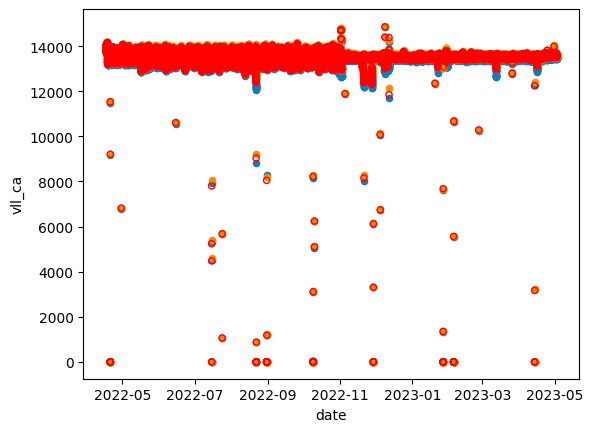

In [14]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','vll_ab', ax=ax)
frj1n.plot.scatter('date','vll_bc', c='darkorange', ax=ax)
frj1n.plot.scatter('date','vll_ca', c='none', edgecolor='red', ax=ax)

<Axes: xlabel='date', ylabel='vll_avg'>

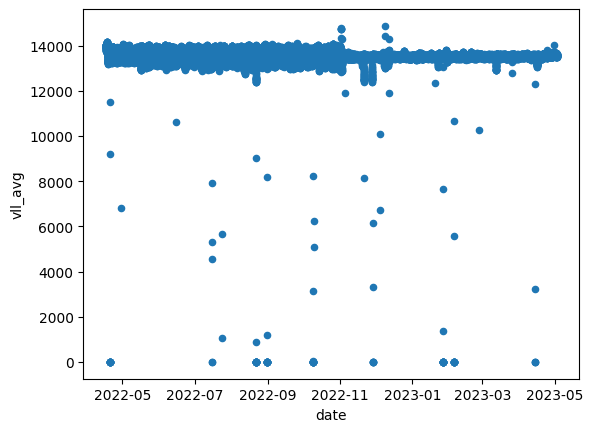

In [15]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','vll_avg', ax=ax)

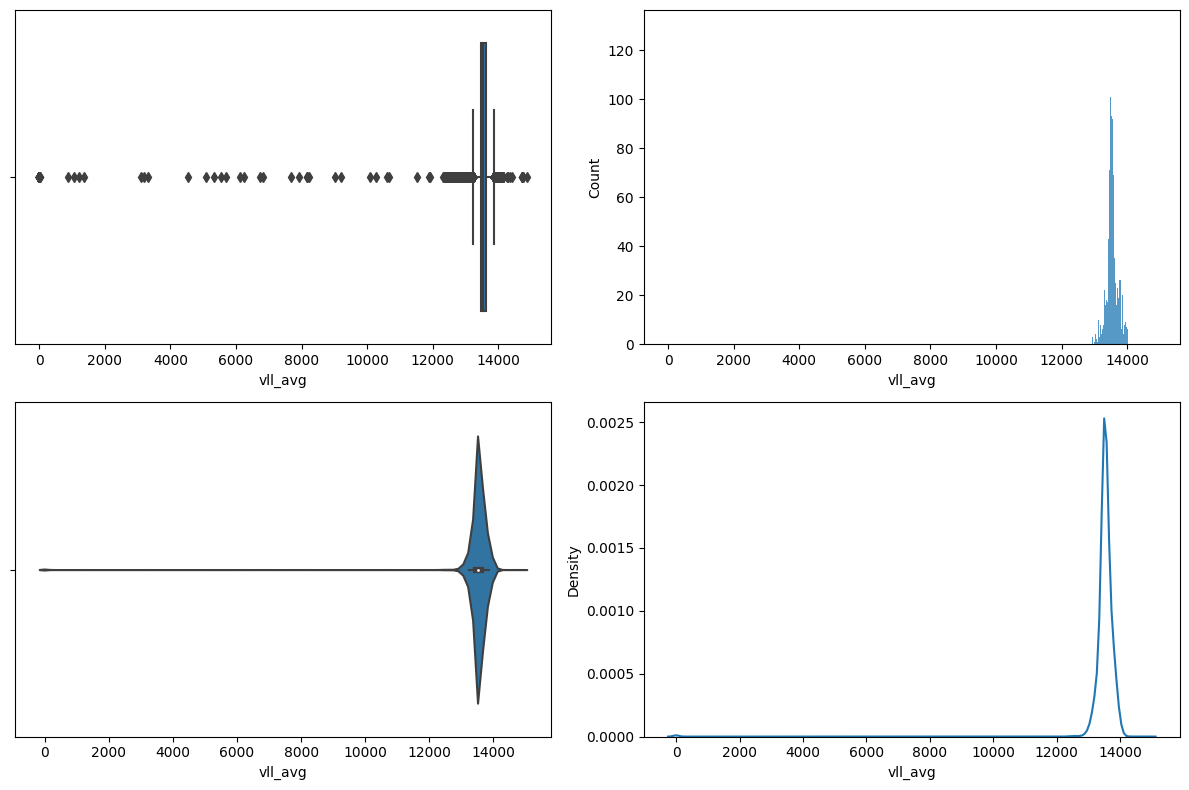

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n, x='vll_avg', orient='h', ax=axs[0,0])
sns.histplot(data=frj1n,x='vll_avg', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n,x='vll_avg', ax=axs[1,0])
sns.kdeplot(data=frj1n, x='vll_avg', ax=axs[1,1])
plt.tight_layout()

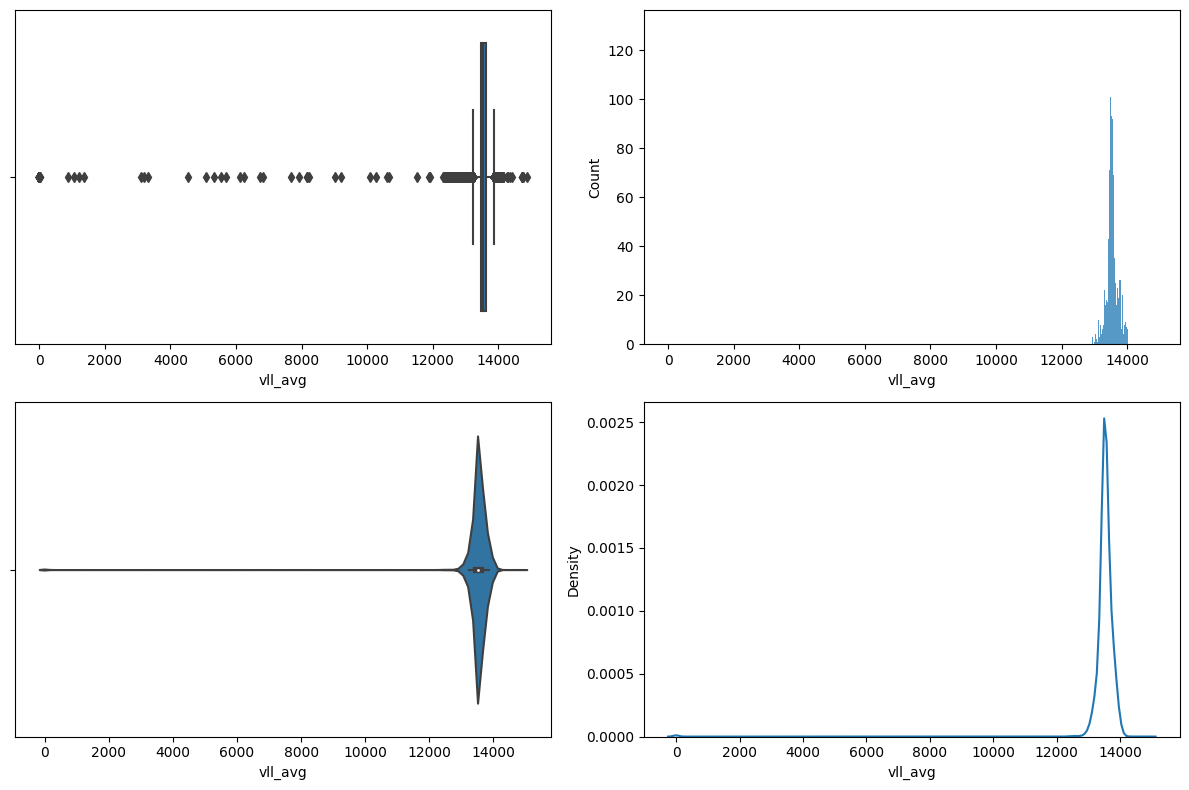

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=kw_tot, x='vll_avg', orient='h', ax=axs[0,0])
sns.histplot(data=frj1n,x='vll_avg', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n,x='vll_avg', ax=axs[1,0])
sns.kdeplot(data=frj1n, x='vll_avg', ax=axs[1,1])
plt.tight_layout()

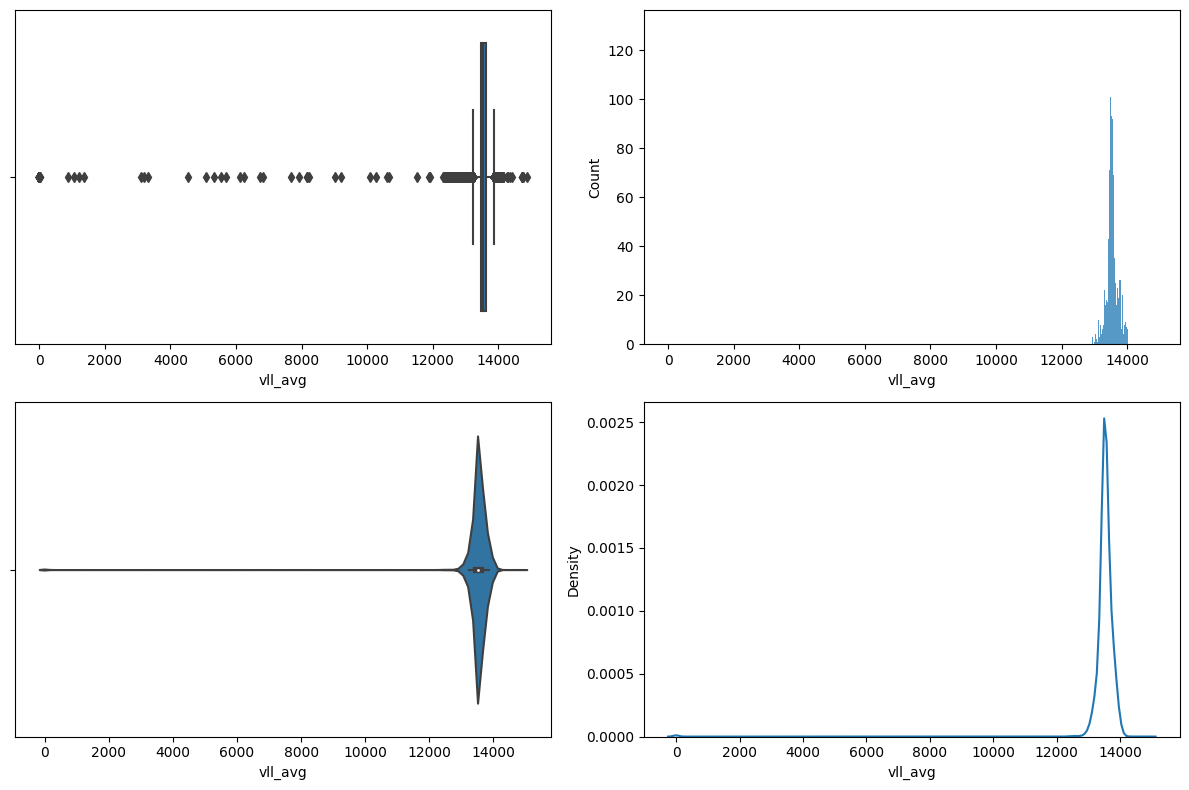

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=kw_tot, x='vll_avg', orient='h', ax=axs[0,0])
sns.histplot(data=frj1n,x='vll_avg', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n,x='vll_avg', ax=axs[1,0])
sns.kdeplot(data=frj1n, x='vll_avg', ax=axs[1,1])
plt.tight_layout()

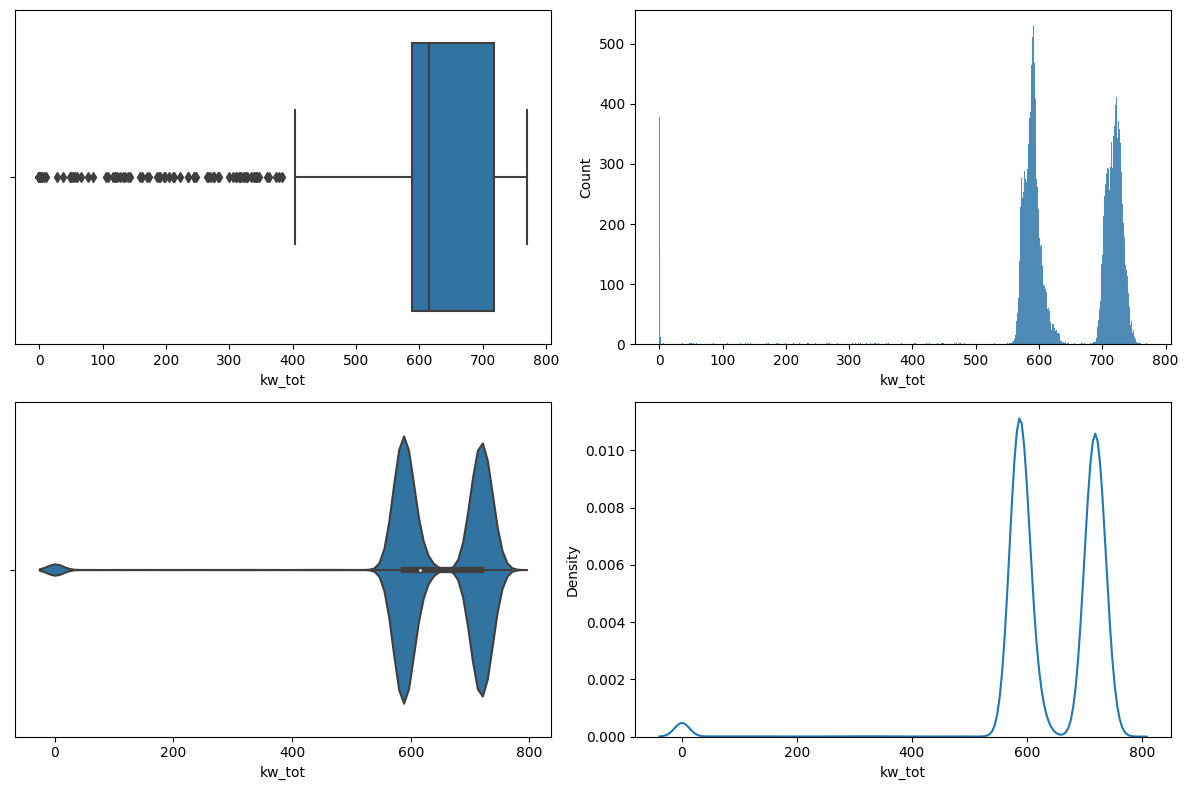

In [16]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n, x='kw_tot', orient='h', ax=axs[0,0]) #los outliers refieren a cortes de energia
sns.histplot(data=frj1n,x='kw_tot', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n,x='kw_tot', ax=axs[1,0])
sns.kdeplot(data=frj1n, x='kw_tot', ax=axs[1,1])
plt.tight_layout()

<Axes: xlabel='date', ylabel='v_unbal'>

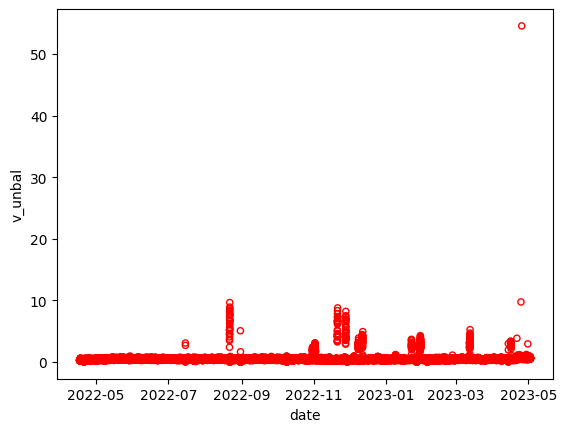

In [17]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','v_unbal',c='none', edgecolor='red', ax=ax)

<Axes: ylabel='Density'>

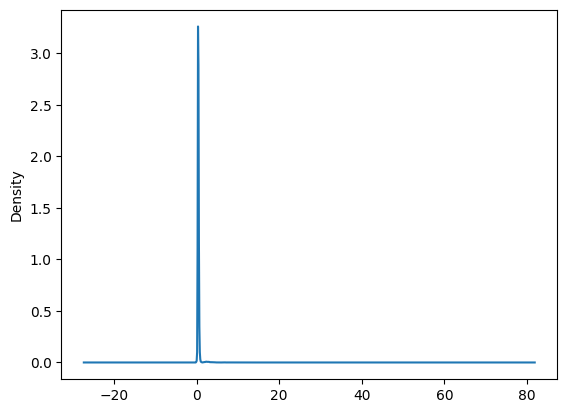

In [18]:
frj1n['v_unbal'].plot.kde()

<Axes: xlabel='date', ylabel='i_c'>

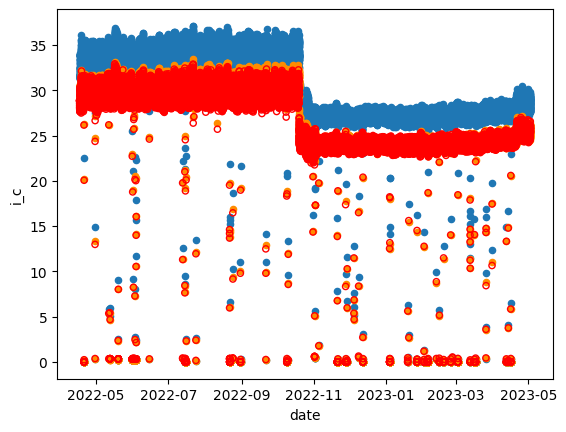

In [20]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','i_a', ax=ax)
frj1n.plot.scatter('date','i_b', c='darkorange', ax=ax)
frj1n.plot.scatter('date','i_c', c='none', edgecolor='red', ax=ax)

#se observa un leve desbalance en la carga para la Fase A

<Axes: xlabel='date', ylabel='i_avg'>

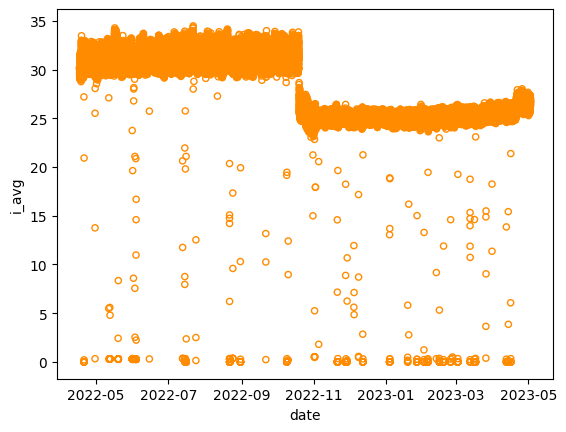

In [21]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','i_avg',c='none', edgecolor='darkorange', ax=ax)

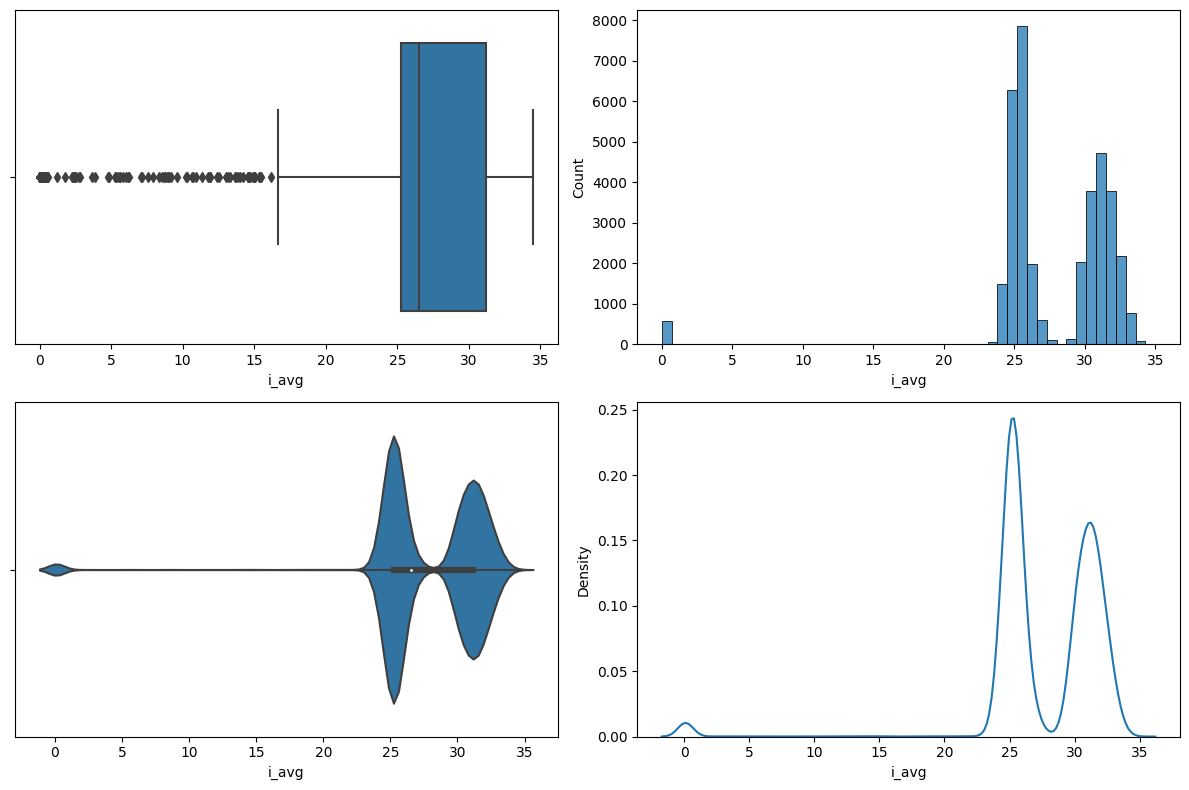

In [23]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n, x='i_avg', orient='h', ax=axs[0,0])
sns.histplot(data=frj1n,x='i_avg', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n,x='i_avg', ax=axs[1,0])
sns.kdeplot(data=frj1n, x='i_avg', ax=axs[1,1])
plt.tight_layout()

#las 2 modas que se observan son el resultado de la implementacion de un Plan de Contingencia que disminuyó la carga 
#de la acometida principal del Data Center

<Axes: xlabel='date', ylabel='kw_tot'>

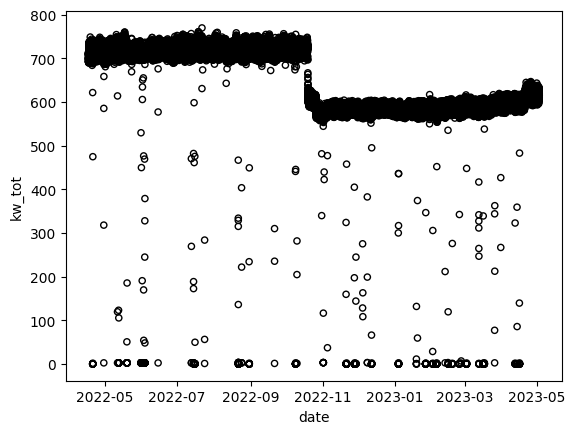

In [24]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','kw_tot',c='none', edgecolor='black', ax=ax)

<Axes: xlabel='date', ylabel='kvar_tot'>

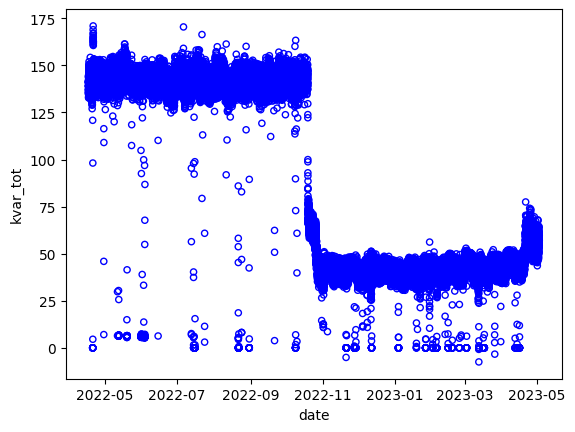

In [25]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','kvar_tot',c='none', edgecolor='blue', ax=ax)

<Axes: xlabel='date', ylabel='kva_tot'>

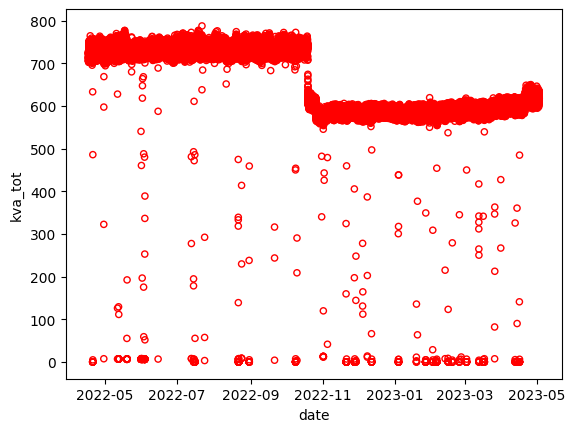

In [26]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','kva_tot',c='none', edgecolor='red', ax=ax)

<Axes: xlabel='date', ylabel='freq'>

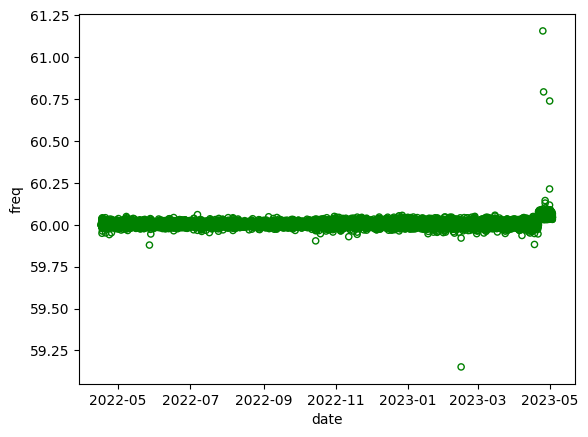

In [27]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','freq',c='none', edgecolor='green', ax=ax)

In [28]:

df = pd.DataFrame(data=frj1n)
del df['date']
del df['SWITCH']

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

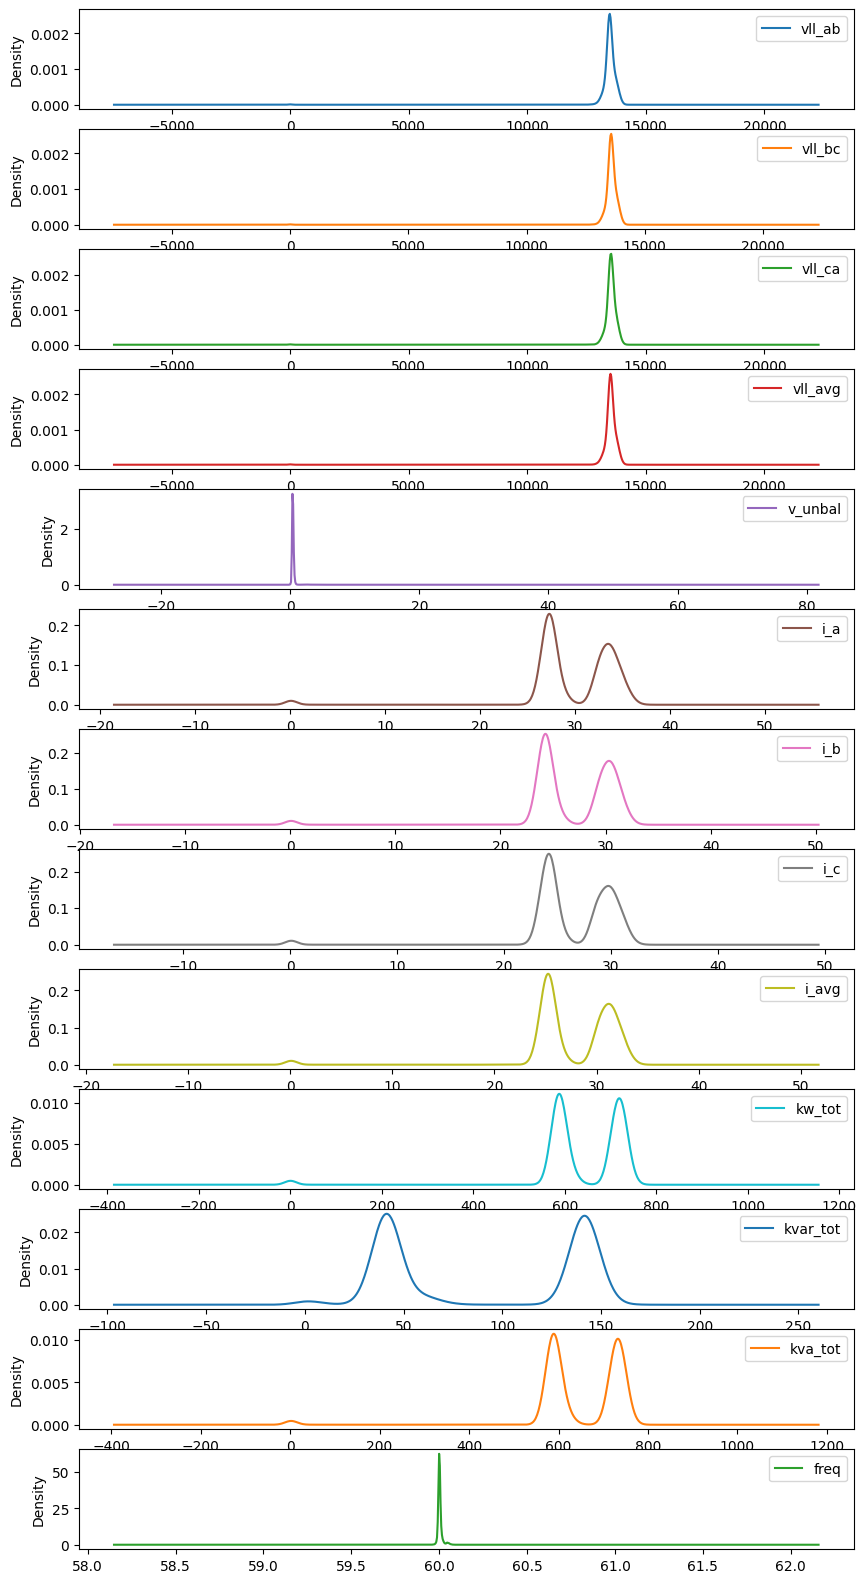

In [29]:
df.plot.kde(subplots=True, figsize=(10,20), sharex=False)

# Los Aires Acondicionados representan un aporte significativo en la demanda de potencia reactiva 
# ya que fueron los que se sacaron hacia el plan de contingencia

<Axes: xlabel='vll_avg', ylabel='i_avg'>

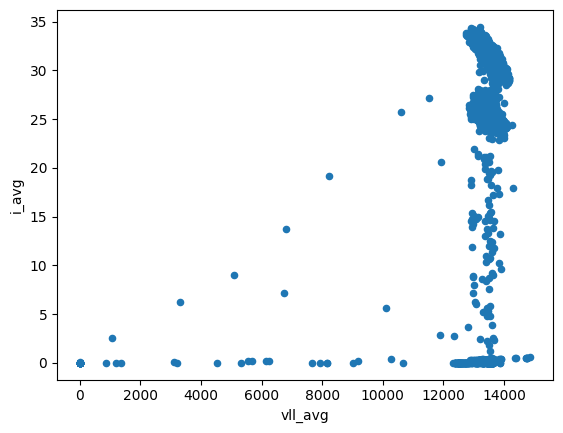

In [30]:
fig, ax = plt.subplots()
frj1n.plot.scatter('vll_avg','i_avg', ax=ax)

<Axes: xlabel='kw_tot', ylabel='i_avg'>

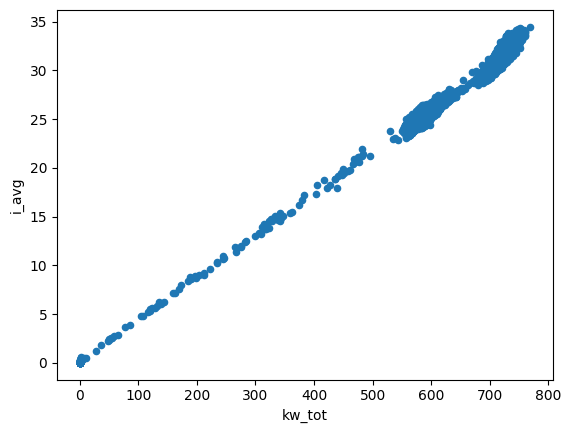

In [31]:
fig, ax = plt.subplots()
frj1n.plot.scatter('kw_tot','i_avg', ax=ax)

<Axes: xlabel='kw_tot', ylabel='vll_avg'>

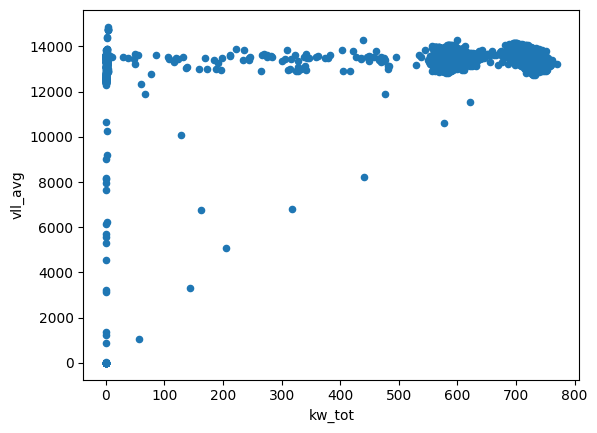

In [32]:
fig, ax = plt.subplots()
frj1n.plot.scatter('kw_tot','vll_avg', ax=ax)

<Axes: xlabel='SWITCH', ylabel='count'>

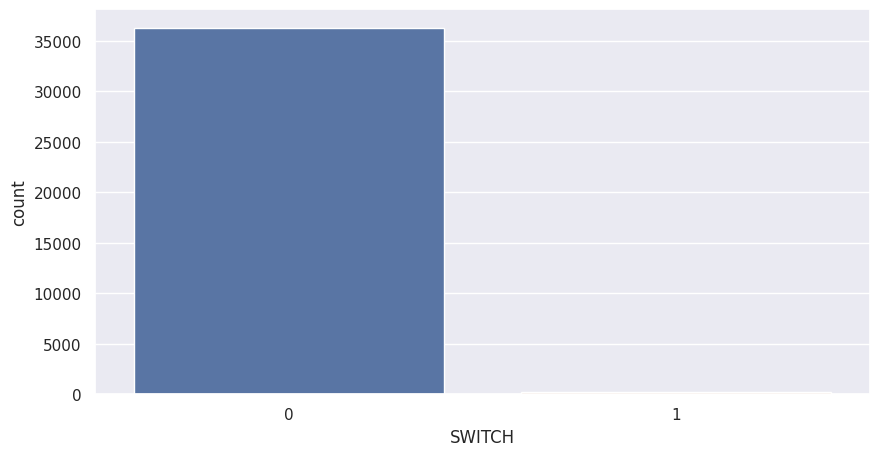

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n,x='SWITCH')

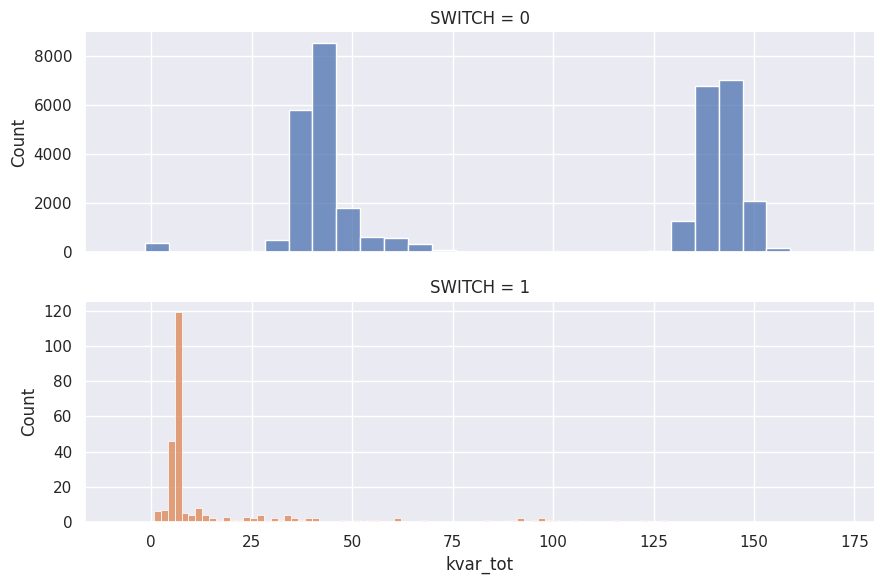

In [ ]:

g = sns.FacetGrid(frj1n, sharey=False, row='SWITCH',  hue='SWITCH',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='kvar_tot')#, log_scale=True, binwidth=0.03)

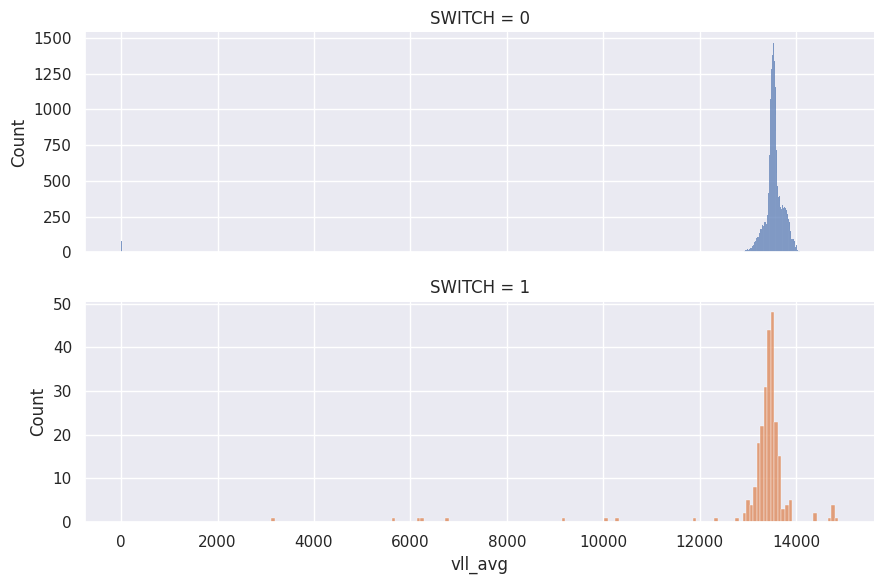

In [ ]:

g = sns.FacetGrid(frj1n, sharey=False, row='SWITCH',  hue='SWITCH',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='vll_avg')#, log_scale=True, binwidth=0.03)

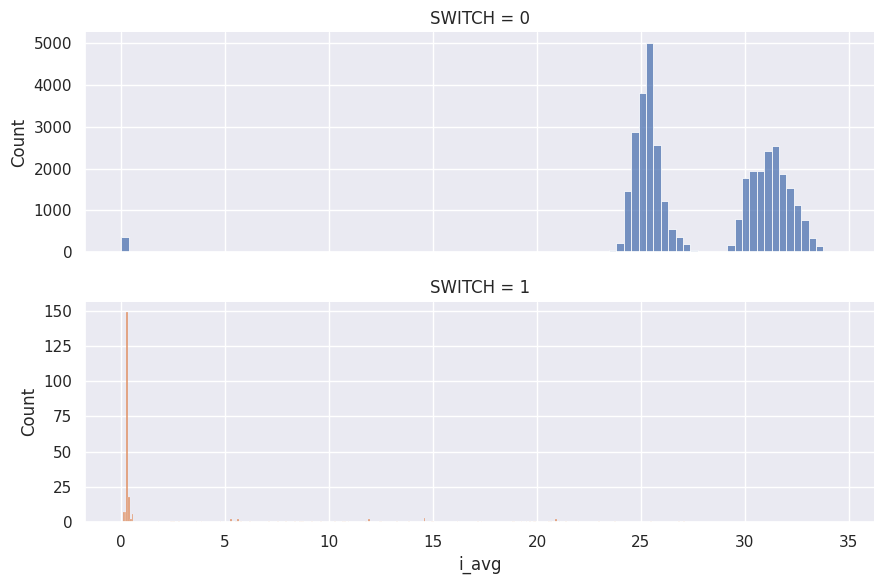

In [ ]:

g = sns.FacetGrid(frj1n, sharey=False, row='SWITCH',  hue='SWITCH',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='i_avg')#, log_scale=True, binwidth=0.03)

In [ ]:
#creacion de nueva feature indicando para visualizar warning por potencia reactiva
frj1n['kvar_warn']=frj1n.kvar_tot.map(lambda x: 'Warning' if x>150 else 'Ok')

In [ ]:
# De acuerdo al REGLAMENTO DEL MERCADO ELÉCTRICO REGIONAL -RMER- en los citerios de operacion del SISTEMA ELECTRICO 
# REGIONAL - SER- en el inciso 16.2.5 Criterios y Parámetros de Calidad indica para la frecuencia de la red:
# 16.2.5   Criterios y Parámetros de Calidad
# 16.2.5.5 La frecuencia nominal del SER es 60 Hz.
# 16.2.5.6 Durante la operación normal, el 90% de las variaciones de la frecuencia promedio en
#          períodos de 10 minutos, deberán estar comprendidas dentro del rango de (60 ± 1.65 σ) Hz,
#          donde σ es la desviación estándar de la frecuencia promedio en períodos de 10 minutos. El
#          valor de σ será de 0.03 Hz.

# creacion de nueva feature indicando riesgo de operacion por frecuencia fuera de 
# parametros de operacion: 60hz+/- 1.65 * (0.03) hz. sigma = 0.03 hz   [59.5, 60.5]

frj1n["freq"] = pd.to_numeric(frj1n["freq"], errors = 'coerce')

frj1n['freq_error']=frj1n.freq.map(lambda x: 'QoE_Ok' if 60.05>x>59.95 else 'QoE_Out')

In [ ]:
#Ejercicio para eliminar minimos por microcortes
#Using drop() to delete rows based on column value
#frj1n.drop(frj1n[frj1n['kw_tot'] <= 550].index, inplace = True)

In [ ]:
#Datos agrupados por dia; se toma el valor maximo de cada día para discriminar los cortes de energia durante periodos cortos
frj = frj1n.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D')).max()

In [ ]:
#frj1n.plot.line("Date/Time","kW tot mean",
#                color = "blue",
#                figsize =(15,10))

<AxesSubplot:xlabel='date'>

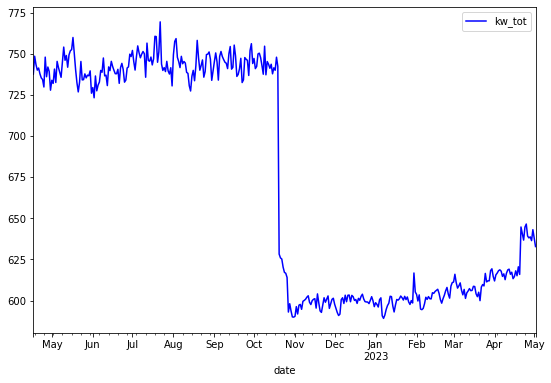

In [ ]:
#Grafico de lineas
frj.plot.line(y="kw_tot",
                color = "blue",
                figsize =(9,6))

In [ ]:
frj1n['kvar_warn'].value_counts()

Ok         35808
Warning      750
Name: kvar_warn, dtype: int64

In [ ]:
frj1n['freq_error'].value_counts()

QoE_Ok     35866
QoE_Out      692
Name: freq_error, dtype: int64

In [ ]:
vmax_ab = frj1n['vll_ab'].max()
vmin_ab = frj1n['vll_ab'].min()

vmax_bc = frj1n['vll_bc'].max()
vmin_bc = frj1n['vll_bc'].min()

vmax_ca = frj1n['vll_ca'].max()
vmin_ca = frj1n['vll_ca'].min()


In [ ]:
vmax_list = (vmax_ab, vmax_bc, vmax_ca)
vmax = max(vmax_list)
vmax

14897.074

In [ ]:
vmin_list = (vmin_ab, vmin_bc, vmin_ca)
vmin = min(vmin_list)
vmin

0.0

In [ ]:
# Desbalance de tension en servicios trifasicos (%). CNEE NTSD (Normas Tecnicas del Servicio de Distribucion), Titulo III.Capitulo III, Articulo 27.

#frj1n['DTD_per'] = for y in   vll_ab, vll_bc, vll_ca : [3*(vmax-vmin)/(vll_ab + vll_bc + vll_ca)] * 100
    
#no me salio la formula

In [ ]:
vnominal = 13600 # voltaje nominal de la red electrica de la EEGSA para el suministro de energia en media tension

frj1n['vclasif_ab'] = frj1n.vll_ab.map(lambda x : 'Voltaj Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))
frj1n['vclasif_bc'] = frj1n.vll_bc.map(lambda x : 'Voltaj Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))
frj1n['vclasif_ca'] = frj1n.vll_ca.map(lambda x : 'Voltaj Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))

frj1n['vclasif_avg'] = frj1n.vll_avg.map(lambda x : 'Voltaj Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))

In [ ]:
frj1n['vclasif_ab'].value_counts()

Voltaj Normal    36213
Bajo Voltaje       337
Alto Voltaje         8
Name: vclasif_ab, dtype: int64

In [ ]:
frj1n['vclasif_bc'].value_counts()

Voltaj Normal    36362
Bajo Voltaje       187
Alto Voltaje         9
Name: vclasif_bc, dtype: int64

In [ ]:
frj1n['vclasif_ca'].value_counts()

Voltaj Normal    36333
Bajo Voltaje       215
Alto Voltaje        10
Name: vclasif_ca, dtype: int64

In [ ]:
frj1n['vclasif_avg'].value_counts()

Voltaj Normal    36319
Bajo Voltaje       230
Alto Voltaje         9
Name: vclasif_avg, dtype: int64

In [ ]:
sns.set_theme(style="darkgrid")

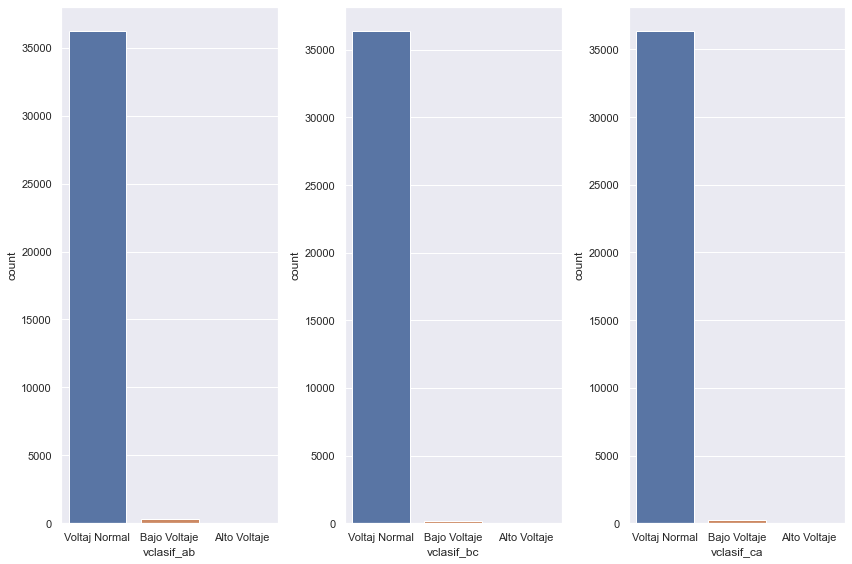

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(12,8)) #create grid
sns.countplot(data=frj1n,x='vclasif_ab', ax=axs[0])
sns.countplot(data=frj1n,x='vclasif_bc', ax=axs[1])
sns.countplot(data=frj1n,x='vclasif_ca', ax=axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='freq_error', ylabel='count'>

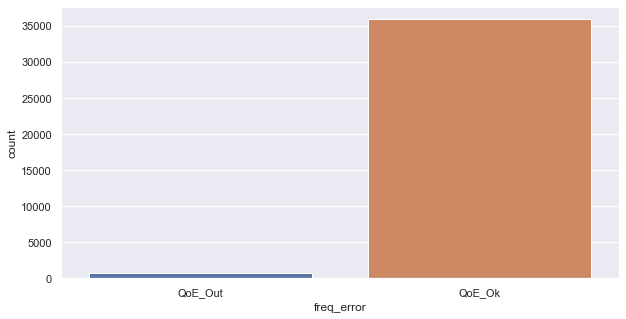

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n,x='freq_error')

<AxesSubplot:xlabel='kvar_warn', ylabel='count'>

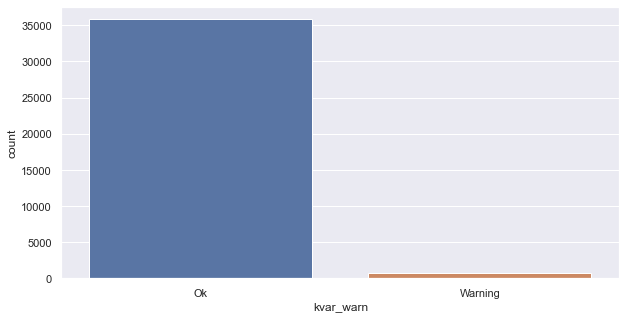

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n,x='kvar_warn')

In [ ]:
frj1n

,date,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,...,kva_tot,PF_lag,PF_lead,freq,kvar_warn,freq_error,vclasif_ab,vclasif_bc,vclasif_ca,vclasif_avg
0,2023-05-02 20:45:00,13564.601,13676.08800,13625.21582,13621.96800,0.681128,28.492443,25.620981,25.445852,26.460642,...,617.649658,99.868370,NaN,60.066013,Ok,QoE_Out,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal
1,2023-05-02 20:30:00,13503.564,13602.38000,13570.26700,13555.15625,0.626721,29.036205,25.575148,25.502625,26.653734,...,620.937866,99.848747,NaN,60.043034,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal
2,2023-05-02 20:15:00,13567.913,13658.65332,13634.95500,13620.50800,0.607101,28.467047,25.240606,25.277708,26.248981,...,612.865906,99.838890,NaN,60.032059,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal
3,2023-05-02 20:00:00,13533.777,13599.11600,13590.74600,13571.46100,0.536207,28.508415,25.224625,25.349134,26.335846,...,613.699890,99.827507,NaN,60.045185,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal
4,2023-05-02 19:45:00,13490.521,13590.71300,13566.94200,13549.31300,0.650523,28.793371,26.007170,25.830090,26.876274,...,626.488770,99.828781,NaN,60.053532,Ok,QoE_Out,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36553,2022-04-17 02:00:00,13794.535,13866.51300,13842.20000,13834.40800,0.243253,32.482582,29.274456,28.863388,30.206839,...,722.371399,98.120148,NaN,60.001320,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal
36554,2022-04-17 01:45:00,13868.192,13957.82900,13915.89800,13913.97100,0.265036,32.559765,29.345390,28.857056,30.254066,...,727.587830,98.010536,NaN,59.993851,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal
36555,2022-04-17 01:30:00,13858.353,13957.39700,13916.41400,13910.70900,0.328898,32.471920,29.166483,28.850023,30.162807,...,725.203430,98.064781,NaN,59.997093,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal
36556,2022-04-17 01:15:00,13815.879,13915.19500,13881.89600,13870.99400,0.348926,32.330872,29.136560,28.907778,30.125074,...,722.348267,98.075676,NaN,60.006119,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal


In [ ]:
frj1n.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,i_4,kw_tot,kvar_tot,kva_tot,PF_lag,PF_lead,freq
count,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.0,36558.000000,36558.000000,36558.000000,36145.000000,416.000000,36464.000000
mean,13462.928725,13555.783462,13503.875369,13507.461920,0.462848,29.912294,26.815128,26.457611,27.727463,0.0,641.444829,89.656266,648.968036,98.542311,99.994232,60.003173
std,692.170325,694.198364,690.917291,692.181875,0.484649,5.031593,4.622766,4.456494,4.702205,0.0,105.695637,50.573302,110.143768,5.043981,0.027621,0.015331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-7.470876,0.000000,21.493174,99.716896,59.151707
25%,13417.313178,13511.507500,13464.372552,13465.366000,0.350081,27.287130,24.281380,24.159137,25.244887,0.0,587.875351,41.407811,589.354462,98.109230,100.000000,59.997280
50%,13484.630500,13580.073500,13532.310250,13531.908000,0.409133,28.744053,25.589006,25.371133,26.541125,0.0,615.820649,60.554441,618.642730,99.435684,100.000000,60.001125
75%,13582.839750,13675.927000,13620.641000,13624.594750,0.483635,33.532539,30.298200,29.696886,31.178847,0.0,718.593155,141.343022,732.354233,99.751770,100.000000,60.005589
max,14856.306000,14897.074000,14854.118000,14869.164000,54.561596,37.106956,33.506409,32.925125,34.483212,0.0,769.496826,170.949509,787.571472,99.999908,100.000000,61.156010


In [ ]:
#creacion de nueva feature indicando para visualizar warning por potencia reactiva
frj1n['FP_bool']=frj1n.PF_lag.map(lambda x: '1' if x>90 else '0')

In [ ]:
frj1n

,date,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,...,PF_lag,PF_lead,freq,kvar_warn,freq_error,vclasif_ab,vclasif_bc,vclasif_ca,vclasif_avg,FP_bool
0,2023-05-02 20:45:00,13564.601,13676.08800,13625.21582,13621.96800,0.681128,28.492443,25.620981,25.445852,26.460642,...,99.868370,NaN,60.066013,Ok,QoE_Out,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal,1
1,2023-05-02 20:30:00,13503.564,13602.38000,13570.26700,13555.15625,0.626721,29.036205,25.575148,25.502625,26.653734,...,99.848747,NaN,60.043034,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal,1
2,2023-05-02 20:15:00,13567.913,13658.65332,13634.95500,13620.50800,0.607101,28.467047,25.240606,25.277708,26.248981,...,99.838890,NaN,60.032059,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal,1
3,2023-05-02 20:00:00,13533.777,13599.11600,13590.74600,13571.46100,0.536207,28.508415,25.224625,25.349134,26.335846,...,99.827507,NaN,60.045185,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal,1
4,2023-05-02 19:45:00,13490.521,13590.71300,13566.94200,13549.31300,0.650523,28.793371,26.007170,25.830090,26.876274,...,99.828781,NaN,60.053532,Ok,QoE_Out,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36553,2022-04-17 02:00:00,13794.535,13866.51300,13842.20000,13834.40800,0.243253,32.482582,29.274456,28.863388,30.206839,...,98.120148,NaN,60.001320,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal,1
36554,2022-04-17 01:45:00,13868.192,13957.82900,13915.89800,13913.97100,0.265036,32.559765,29.345390,28.857056,30.254066,...,98.010536,NaN,59.993851,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal,1
36555,2022-04-17 01:30:00,13858.353,13957.39700,13916.41400,13910.70900,0.328898,32.471920,29.166483,28.850023,30.162807,...,98.064781,NaN,59.997093,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal,1
36556,2022-04-17 01:15:00,13815.879,13915.19500,13881.89600,13870.99400,0.348926,32.330872,29.136560,28.907778,30.125074,...,98.075676,NaN,60.006119,Ok,QoE_Ok,Voltaj Normal,Voltaj Normal,Voltaj Normal,Voltaj Normal,1
